<a href="https://colab.research.google.com/github/Renan-LS/Renan-LS/blob/main/E_gov_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PROJETO: Como aumento do PIB e gastos do governo impactam os setores de saúde e educação?**




Definição do problema:
O papel do governo no crescimento econômico tem sido um problema desde há muito
tempo, com a percepção de que, para um desenvolvimento sustentável e uma produção
eficiente, o papel do governo nas políticas econômicas deve ser reduzido.

Dado este cenário fiscal, é necessário identificar a relação entre o PIB (Produto InternoBruto) e as despesas do governo nos setores de saúde e educação e como se relacionam com o crescimento do PIB na economia de um país.




Para este trabalho não vamos considerar um país específico a fim de evitar qualquer tipo de polêmica ou viés. Nosso objetivo aqui é estudar e aplicar  nálise de dados. Portanto, este projeto se aplica a qualquer país.

Principais objetivos:

	1. Em que ano o país teve um alto crescimento do PIB Per Capita?
	2. Qual ano teve as maiores despesas com saúde?
	3. Qual ano teve os maiores gastos com educação?
	4. Como a receita do governo se correlaciona com a despesa do governo?
	5. Como a educação e a saúde se correlacionam com o crescimento do PIB?
	6. Como os gastos do governo com educação e saúde afetam o crescimento do PIB?
	7. Com base na análise quais são as recomendações aos governantes e gestores?

Fonte de dados:

Dicionário de dados:

In [81]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.linear_model import LinearRegression

## Carregando e Compreendendo os Dados


In [3]:
dados_egov = pd.read_excel('/content/dataset.xlsx')

In [4]:
dados_egov.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.85074,25.437891,24.98009,5.169123,NaN,NaN,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000
1,2004,23.40954,27.526983,26.66815,5.344949,NaN,NaN,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000
2,2005,NaN,30.960957,27.46934,5.314364,NaN,NaN,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000
3,2006,21.67777,40.938290,25.08140,5.873449,NaN,NaN,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,2.582552e+10,109.212364,1862041000000
4,2007,NaN,50.321873,NaN,5.997067,NaN,NaN,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,3.195820e+10,109.941251,2151349000000


## Análise Exploratória

In [5]:
# Tipos de dados
dados_egov.dtypes

ano_coleta                        int64
despesas_educ_percent           float64
despesas_saude_per_capita       float64
despesas_educ_total             float64
despesas_saude_%pib             float64
receita_trib_%pib               float64
receita_excl_doa_%pib           float64
ibrd_e_ida                      float64
pop_cresc_anual%                float64
pib_cresc_per_capita_%pib       float64
pib_deflator                    float64
domestic_saude_despesas_%pib    float64
pib_cresc_anual%                float64
pib_cor_us$                     float64
despesa_nac_bruta_%pib          float64
pib_moeda_local                   int64
dtype: object

In [6]:
# Resumo estatístico
dados_egov.describe()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
count,17.000000,8.000000,15.000000,13.000000,15.000000,5.000000,5.000000,1.600000e+01,17.000000,17.000000,17.000000,15.000000,17.000000,1.700000e+01,17.000000,1.700000e+01
mean,2011.000000,34.776599,55.265036,20.844645,5.555868,16.008023,21.028661,3.667159e+09,2.606996,2.539702,117.186747,1.754343,5.247425,4.851720e+10,112.318030,4.387753e+12
std,5.049752,10.632141,17.077696,3.828826,0.412144,0.677579,0.944677,9.532678e+08,0.172462,1.798253,46.934509,0.249802,1.809246,2.477595e+10,2.112360,2.776122e+12
min,2003.000000,20.850740,25.437891,16.664660,4.802543,15.085142,19.620423,2.663224e+09,2.271902,-2.503373,51.824235,1.416008,0.232283,1.490452e+10,109.212364,1.131782e+12
25%,2007.000000,22.976598,45.630081,17.708700,5.266875,15.637825,20.616187,2.946771e+09,2.491937,2.283178,77.789734,1.522404,4.805697,3.195820e+10,110.429285,2.151349e+12
50%,2011.000000,41.763410,57.387424,19.252830,5.519421,16.183533,21.199592,3.313021e+09,2.693733,3.045012,113.111372,1.771546,5.718507,4.195343e+10,112.164729,3.725918e+12
75%,2015.000000,42.682555,69.282478,24.980090,5.935258,16.256635,21.738908,4.244785e+09,2.739229,3.346252,154.710423,1.950641,6.108264,6.400775e+10,114.066709,6.284185e+12
max,2019.000000,43.124180,76.610321,27.469340,6.116753,16.876979,21.968194,5.801797e+09,2.768560,5.494077,192.904792,2.148430,8.405699,9.550309e+10,116.218812,9.740360e+12


In [7]:
# Verificando valores ausentes
dados_egov.isnull().sum()

ano_coleta                       0
despesas_educ_percent            9
despesas_saude_per_capita        2
despesas_educ_total              4
despesas_saude_%pib              2
receita_trib_%pib               12
receita_excl_doa_%pib           12
ibrd_e_ida                       1
pop_cresc_anual%                 0
pib_cresc_per_capita_%pib        0
pib_deflator                     0
domestic_saude_despesas_%pib     2
pib_cresc_anual%                 0
pib_cor_us$                      0
despesa_nac_bruta_%pib           0
pib_moeda_local                  0
dtype: int64

## Limpeza e Processamento dos Dados

In [8]:
# Limpando valores ausentes através de backfilling e interpolação
# interpolação = trocar valores ausentes pela média
# Backfilling = preenchendo os valores ausentes com valores exatamente anteriores
dados_egov['receita_trib_%pib'].fillna(method = 'bfill', inplace = True)
dados_egov['receita_excl_doa_%pib'].fillna(method = 'bfill', inplace = True)
dados_egov = dados_egov.interpolate()

### Foi escolhido realizar a combinação de Backfilling e interpolação devido ao reduzido volume de amostras no dataset.

In [9]:
# Verificando valores ausentes
dados_egov.isnull().sum()

ano_coleta                      0
despesas_educ_percent           0
despesas_saude_per_capita       0
despesas_educ_total             0
despesas_saude_%pib             0
receita_trib_%pib               0
receita_excl_doa_%pib           0
ibrd_e_ida                      0
pop_cresc_anual%                0
pib_cresc_per_capita_%pib       0
pib_deflator                    0
domestic_saude_despesas_%pib    0
pib_cresc_anual%                0
pib_cor_us$                     0
despesa_nac_bruta_%pib          0
pib_moeda_local                 0
dtype: int64

In [10]:
# Novo resumo Estatístico
dados_egov.describe()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,1.700000e+01,17.000000,17.000000,17.000000,17.000000,17.000000,1.700000e+01,17.000000,1.700000e+01
mean,2011.000000,35.074891,57.776246,21.090617,5.467242,16.516002,21.405395,3.792726e+09,2.606996,2.539702,117.186747,1.789429,5.247425,4.851720e+10,112.318030,4.387753e+12
std,5.049752,8.839502,17.476959,3.465640,0.459588,0.642621,0.736926,1.058284e+09,0.172462,1.798253,46.934509,0.253792,1.809246,2.477595e+10,2.112360,2.776122e+12
min,2003.000000,20.850740,25.437891,16.664660,4.802543,15.085142,19.620423,2.663224e+09,2.271902,-2.503373,51.824235,1.416008,0.232283,1.490452e+10,109.212364,1.131782e+12
25%,2007.000000,25.852864,50.321873,19.104030,5.169123,16.256635,21.738908,2.968119e+09,2.491937,2.283178,77.789734,1.556385,4.805697,3.195820e+10,110.429285,2.151349e+12
50%,2011.000000,41.763150,59.169811,19.923900,5.459336,16.876979,21.738908,3.388428e+09,2.693733,3.045012,113.111372,1.793809,5.718507,4.195343e+10,112.164729,3.725918e+12
75%,2015.000000,41.763670,72.888924,23.950048,5.873449,16.876979,21.738908,4.381759e+09,2.739229,3.346252,154.710423,2.052572,6.108264,6.400775e+10,114.066709,6.284185e+12
max,2019.000000,43.124180,76.610321,27.469340,6.116753,16.876979,21.968194,5.801797e+09,2.768560,5.494077,192.904792,2.148430,8.405699,9.550309e+10,116.218812,9.740360e+12


In [11]:
# Vamos remover a coluna gdp em US$ uma vez que já o temos na moeda local.
dados_egov = dados_egov.drop(columns = ['pib_cor_us$'])

In [ ]:
# Salvamos o dataset limpo

dados_egov.to_csv('/content/dataset_limpo.csv',line_terminator='\n')

## Análise de Dados

## <font color = "red">1- Em Que Ano o País Teve um Alto Crescimento do PIB Per Capita?</font>

In [12]:
dados_egov.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.850740,25.437891,24.980090,5.169123,16.876979,21.738908,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,111.732648,1131782000000
1,2004,23.409540,27.526983,26.668150,5.344949,16.876979,21.738908,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,110.347249,1274329000000
2,2005,22.543655,30.960957,27.469340,5.314364,16.876979,21.738908,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,110.429285,1415725000000
3,2006,21.677770,40.938290,25.081400,5.873449,16.876979,21.738908,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,109.212364,1862041000000
4,2007,25.852864,50.321873,23.950048,5.997067,16.876979,21.738908,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,109.941251,2151349000000


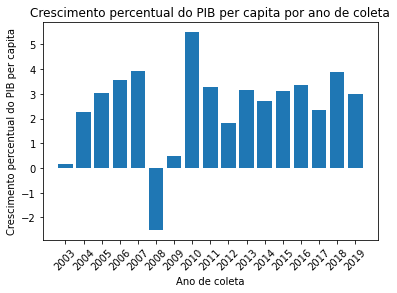

In [46]:
plt.bar(dados_egov['ano_coleta'], dados_egov['pib_cresc_per_capita_%pib'])

# Configurando o título e rótulos dos eixos
plt.title('Crescimento percentual do PIB per capita por ano de coleta')
plt.xlabel('Ano de coleta')
plt.ylabel('Crescimento percentual do PIB per capita')

#definindo a granularidade do eixo X
plt.xticks(dados_egov['ano_coleta'], rotation=45)
# Exibindo o gráfico
plt.show()

### De acordo com o gráfico, o ano em que o país obteve o maior crescimento do PIB per capita foi 2010.

## <font color = "red">2- Qual Ano Teve as Maiores Despesas com Saúde?</font>

In [14]:
# Visualiza os dados
dados_egov.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.850740,25.437891,24.980090,5.169123,16.876979,21.738908,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,111.732648,1131782000000
1,2004,23.409540,27.526983,26.668150,5.344949,16.876979,21.738908,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,110.347249,1274329000000
2,2005,22.543655,30.960957,27.469340,5.314364,16.876979,21.738908,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,110.429285,1415725000000
3,2006,21.677770,40.938290,25.081400,5.873449,16.876979,21.738908,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,109.212364,1862041000000
4,2007,25.852864,50.321873,23.950048,5.997067,16.876979,21.738908,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,109.941251,2151349000000


In [79]:
#calculo de despesa nacional bruto
despesa_nacional = (dados_egov['despesa_nac_bruta_%pib'])/100 * dados_egov['pib_moeda_local']
dados_egov['despesa_nacional'] = (dados_egov['despesa_nac_bruta_%pib'])/100 * dados_egov['pib_moeda_local']

In [75]:
#calculo das despesas total com saúde
dados_egov['desp_saude'] = (dados_egov['despesas_saude_%pib']+dados_egov['domestic_saude_despesas_%pib'])/100 * despesa_nacional

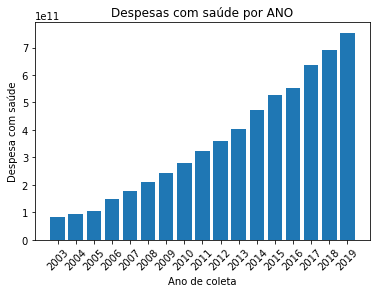

In [45]:
plt.bar(dados_egov['ano_coleta'], desp_saude)

# Configurando o título e rótulos dos eixos
plt.title('Despesas com saúde por ANO') 
plt.xlabel('Ano de coleta')
plt.ylabel('Despesa com saúde')

#definindo a granularidade do eixo X
plt.xticks(dados_egov['ano_coleta'], rotation=45)
# Exibindo o gráfico
plt.show()

## <font color = "red">3- Qual Ano Teve os Maiores Gastos com Educação?</font>

In [38]:
# Visualiza os dados
dados_egov.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.850740,25.437891,24.980090,5.169123,16.876979,21.738908,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,111.732648,1131782000000
1,2004,23.409540,27.526983,26.668150,5.344949,16.876979,21.738908,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,110.347249,1274329000000
2,2005,22.543655,30.960957,27.469340,5.314364,16.876979,21.738908,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,110.429285,1415725000000
3,2006,21.677770,40.938290,25.081400,5.873449,16.876979,21.738908,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,109.212364,1862041000000
4,2007,25.852864,50.321873,23.950048,5.997067,16.876979,21.738908,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,109.941251,2151349000000


In [77]:
#calculo das despesas total com saúde
dados_egov['desp_educacao'] = (dados_egov['despesas_educ_total'])/100 * despesa_nacional

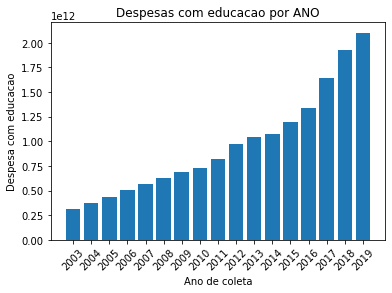

In [44]:
plt.bar(dados_egov['ano_coleta'], desp_educacao)

# Configurando o título e rótulos dos eixos
plt.title('Despesas com educacao por ANO') 
plt.xlabel('Ano de coleta')
plt.ylabel('Despesa com educacao')

#definindo a granularidade do eixo X
plt.xticks(dados_egov['ano_coleta'], rotation=45)
# Exibindo o gráfico
plt.show()

## <font color = "red">4- Como a Receita do Governo se Correlaciona com a Despesa do Governo?</font>

In [47]:
# Visualiza os dados
dados_egov.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.850740,25.437891,24.980090,5.169123,16.876979,21.738908,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,111.732648,1131782000000
1,2004,23.409540,27.526983,26.668150,5.344949,16.876979,21.738908,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,110.347249,1274329000000
2,2005,22.543655,30.960957,27.469340,5.314364,16.876979,21.738908,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,110.429285,1415725000000
3,2006,21.677770,40.938290,25.081400,5.873449,16.876979,21.738908,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,109.212364,1862041000000
4,2007,25.852864,50.321873,23.950048,5.997067,16.876979,21.738908,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,109.941251,2151349000000


<Axes: >

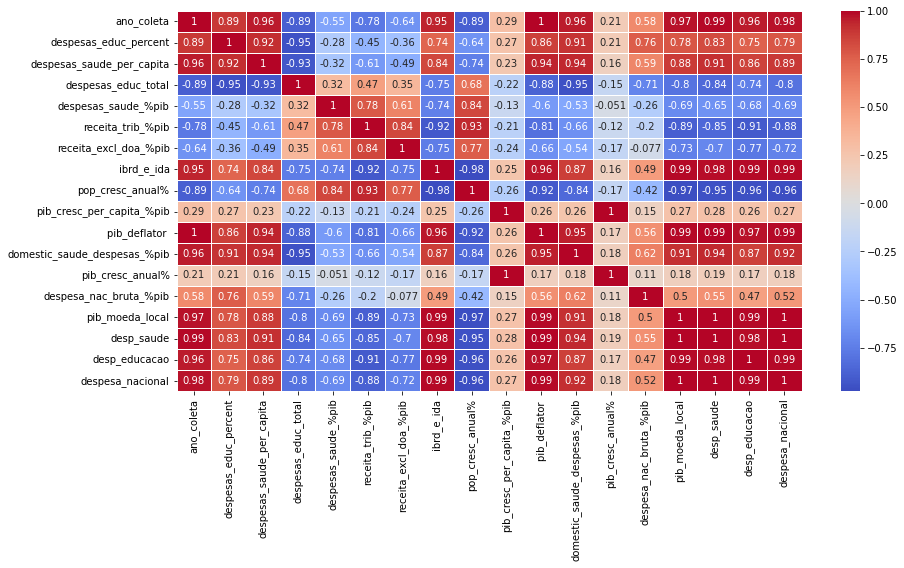

In [80]:
#calculando correlação entre os atributos
corr_matrix = dados_egov.corr()

#plotando mapa de calor
plt.figure(figsize = (14,7))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm',linewidths=0.9)

Tendo em vista a matriz de correlação apresentada, podemos inferir:

*Receita de impostos*:
*   Despesas com saúde(despesas_saude_%pib) apresentam forte correlação positiva com receita tributária do governo(receita_trib_%pib), o que as tornam diretamente proporcionais. [+0,78]
*   Despesas com educação(despesas_saude_%pib) apresentam forte correlação positiva com receita tributária do governo(receita_trib_%pib), o que também a tornam diretamente proporcionais.[+0,47]
*   **A primeira correlação se apresenta mais forte, o que indica que esta possui uma relação linear mais intensa entre duas variáveis que a segunda.**




*Receita de Empréstimos do BIRD e Créditos AID*


*   Despesas com saúde(despesas_saude_%pib) apresentam forte correlação positiva com os Empréstimos do BIRD e Créditos AID(ibrd_e_ida), o que as tornam diretamente proporcionais.[+0,74]
*   Despesas com educação(despesas_saude_%pib) apresentam forte correlação positiva com os Empréstimos do BIRD e Créditos AID(ibrd_e_ida), o que as tornam diretamente proporcionais.[+0,75]





